## Plotting burnt area over time

In [1]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

import os
from   io     import StringIO
import numpy  as np
import pandas as pd
import csv

import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import iris.coord_categorisation
import cftime
import nc_time_axis
import numpy.ma as ma
%matplotlib inline
import cartopy.crs as ccrs
from   libs.plot_maps    import *

Load in burnt area data from both observation and model

In [35]:
dir = '../outputs/model_runs/'
file = 'no_tree_scaled_RH_light_c.nc'

dir_obs = '../outputs/'
file_obs = 'fire2000-2014_masked_test2.nc'

cubes = iris.load_cube(dir + file, 'burnt_area')
cubes_obs = iris.load_cube(dir_obs + file_obs)

Plot when collapsed over time 

In [37]:
iris.coord_categorisation.add_year(cubes, 'time', name='year')

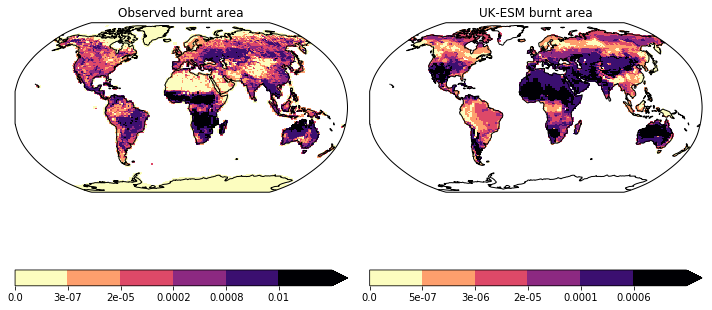

In [22]:
canopy_lon_lat = cubes.collapsed('time', iris.analysis.MEAN)
canopy_lon_lat.long_name = 'UK-ESM burnt area'
canopy_obs_lon_lat = cubes_obs.collapsed('time', iris.analysis.MEAN)
canopy_obs_lon_lat.long_name = 'Observed burnt area'


plt.figure(figsize = (10, 7.5))

plot_lonely_cube(canopy_obs_lon_lat, 1, 2, 1, cmap = 'magma_r', levels = None)
plot_lonely_cube(canopy_lon_lat, 1, 2, 2, cmap = 'magma_r', levels = None)

Timeline plot of modelled burnt_area

In [34]:
# Aim: find the min of each year, then the mean of that

canopy_t = cubes.collapsed(['longitude','latitude'], iris.analysis.SUM)
canopy_yr = canopy_t.aggregated_by(['year'],iris.analysis.MEAN)
# print(canopy_yr)

# canopy_t_obs = cubes_obs.collapsed(['longitude','latitude'], iris.analysis.SUM)
# canopy_yr_obs = canopy_t_obs.aggregated_by(['year'],iris.analysis.MEAN)
# print(canopy_t_obs)
# print(canopy_yr_obs)

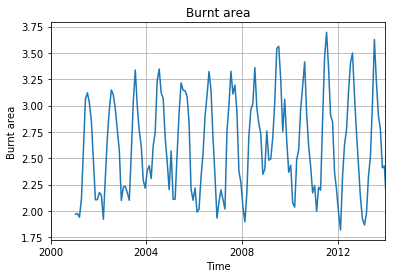

In [33]:
qplt.plot(canopy_t)
plt.xlim(t_start, t_fin)
plt.grid()
# plt.xticks(xtick)

qplt.show()

Plotting observed fire

In [109]:
# Re-loading in the data
dir_obs = '../outputs/'
file_obs = 'fire2000-2014_masked_test.nc'
template = '../data/UKESM/retrieved_codes/2000-2014/cropland2001-2014.nc'

cubes_temp = iris.load_cube(template)
cubes_obs = iris.load_cube(dir_obs + file_obs)

In [110]:
cubes_temp.data = cubes_obs.data

In [111]:
iris.coord_categorisation.add_year(cubes_temp, 'time', name='year')
# iris.coord_categorisation.add_month(cubes_obs, 'time', name='month')

In [112]:
# years = range(2000,2014,1)
# i = 0

# for y in years:
#     cubes_obs.coord('year').points[i:(i+12)] = y
#     i += 12
    
# cubes_obs.long_name = 'Observed burnt area'
# # print(cubes_obs.coord('year').points)
# # print(cubes_obs.data.mean)

In [120]:
canopy_t_obs = cubes_temp.collapsed(['longitude','latitude'], iris.analysis.SUM)
canopy_yr_obs = canopy_t_obs.aggregated_by(['year'],iris.analysis.MEAN)

# print(canopy_t_obs)
# print(canopy_yr_obs)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


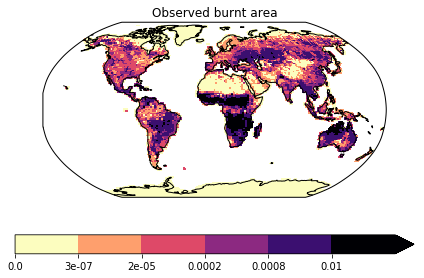

In [118]:
canopy_obs_lon_lat = cubes_temp.collapsed('time', iris.analysis.MEAN)
canopy_obs_lon_lat.long_name = 'Observed burnt area'

plot_lonely_cube(canopy_obs_lon_lat, 1, 1, 1, cmap = 'magma_r', levels = None)
print(canopy_yr_obs.data)

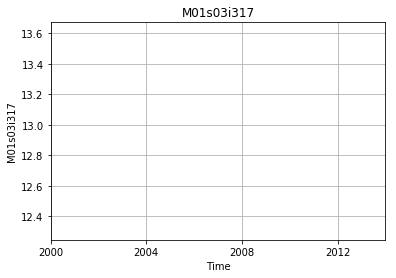

In [117]:
qplt.plot(canopy_t_obs)
plt.xlim(t_start, t_fin)
plt.grid()
# plt.xticks(xtick)

qplt.show()